## Detección de anomalías en series temporales

### Para desarrollar un sistema de alerta temprana que prediga y anticipe posibles problemas en la máquina. Para desarrollar este sistema, seguiría los siguientes pasos:

#### 1. Análisis y preprocesamiento de datos: En primer lugar, analizaría y preprocesaría los datos proporcionados para asegurarme de que estén limpios y listos para su uso. Esto puede incluir la eliminación outliers y la conversión de los datos de series temporales en un formato adecuado.

#### 2. División de datos: Divider los datos en conjuntos de entrenamiento, validación y prueba para evaluar y ajustar el rendimiento del modelo.

#### 3. Selección del algoritmo: Para este problema, se podrían utilizar  algoritmos de aprendizaje supervisado, como regresión logística o redes neuronales recurrentes (RNN) y las redes de memoria a largo plazo (LSTM). También se podrían utilizar algoritmos específicos para series temporales, como ARIMA o SARIMA.

#### 4. Entrenamiento y ajuste del modelo: Entrenaría el modelo seleccionado utilizando el conjunto de entrenamiento y ajustaría sus hiperparámetros utilizando el conjunto de validación para mejorar su rendimiento.

#### 5. Evaluación del rendimiento: Una vez que el modelo esté entrenado y ajustado, lo evaluaría en el conjunto de prueba para obtener una estimación realista de su rendimiento en datos no vistos previamente. Utilizaría métricas como el accuracy,  el valor F1_SCORE y la curva ROC-AUC para medir el rendimiento del modelo.

#### 6. Implementación del sistema de alerta: Si el rendimiento del modelo es satisfactorio, lo implementaría como un sistema de alerta en tiempo real que monitorea las lecturas de temperatura y genera alertas cuando se predice un fallo inminente.

### En una primera aproximacion, no es necesario desarrollar un algoritmo ad hoc para resolver este problema, ya que hay varios algoritmos y técnicas disponibles que pueden abordar este tipo de problemas de series temporales. La clave es seleccionar el algoritmo adecuado y ajustarlo correctamente para obtener el mejor rendimiento en este caso específico.

### Para llevar a la propuesta he implementado el siguiente codigo: 

#### Importar librerias necesarias

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import datetime

C:\Users\Asus\anaconda3\envs\aaaa\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


#### Creacion de clase cuyos metodos seran utilizados para la prediccion de anomalias

In [2]:
class Time_Series:
    def __init__(self, filename: str):
        self.filename = filename
        self.df = None

    def read_csv_file(self) -> pd.DataFrame:
        """
        Read a CSV file and return a pandas DataFrame.
        """
        with open(self.filename) as file:
            self.df = pd.read_csv(file)
        return self.df

    def drop_duplicates(self) -> pd.DataFrame:
        """
        Drop duplicate rows from the pandas DataFrame and return the resulting DataFrame.
        """
        self.df = self.df.drop_duplicates()
        return self.df

    def cast_timestamp(self) -> pd.DataFrame:
        """
        Cast the 'timestamp' column of the pandas DataFrame to a datetime object and return the resulting DataFrame.
        """
        self.df['timestamp'] = self.df['timestamp'].apply(lambda x: datetime.datetime.fromtimestamp(x))
        return self.df

    def sort_by_timestamp(self) -> pd.DataFrame:
        """
        Sort the pandas DataFrame by the 'timestamp' column in ascending order and return the resulting DataFrame.
        """
        self.df = self.df.sort_values(by=['timestamp'], ascending=True).reset_index().drop(columns=['index'])
        return self.df
    
    def data_preparation_train(self, df):
        return df[:int(df.shape[0]*0.85)]

    def data_preparation_test(self, df):
        return df[int(df.shape[0]*0.85):]
    
    def scale_data(self,df) -> pd.DataFrame:
        """
        Scale the 'temperatura' column of the pandas DataFrame and return the resulting DataFrame.
        """
        scaler = StandardScaler()
        df["temperatura"] = scaler.fit_transform(df["temperatura"].values.reshape(-1, 1))
        return df  
    
    def split_train_test_data_train(self, df):
        """
        Split the pandas DataFrame into train/test sets and return X_train, X_test, y_train, y_test as numpy arrays.
        """
        X_train, X_test, y_train, y_test = train_test_split(
        df["temperatura"].values, df["fallo"].values, test_size=0.2, random_state=42, shuffle=False)
        self.X_train_reshaped = np.reshape(X_train, (X_train.shape[0], 1, 1))
        self.X_test_reshaped = np.reshape(X_test, (X_test.shape[0], 1, 1))
        self.y_train = y_train
        self.y_test = y_test
        return self.X_train_reshaped, self.X_test_reshaped, self.y_train, self.y_test
 

    def build_model(self) -> Sequential:
        """
        Build an LSTM model and return the model.
        """
        model = Sequential()
        model.add(LSTM(50, input_shape=(1,1)))
        model.add(Dense(1, activation='sigmoid'))
        model.compile(loss='binary_crossentropy', optimizer='adam')
        return model
    

    def fit_model(self):
        self.model = self.build_model()
        self.history = self.model.fit(self.X_train_reshaped, self.y_train, epochs=20, batch_size=1)
        return self.history
  
    def predictions(self, df):
        predictions = model.predict(df)
        return predictions    

### Paso 1

In [3]:
time_series = Time_Series("historicos series temporales.csv")

In [4]:
time_series.read_csv_file()

,timestamp,fallo,temperatura
0,1.552490e+09,0,0.633453
1,1.552490e+09,0,0.633453
2,1.552491e+09,0,0.633453
3,1.552492e+09,0,0.633453
4,1.552492e+09,0,0.633453
...,...,...,...
12245,1.558598e+09,0,0.619355
12246,1.558598e+09,0,0.619355
12247,1.558598e+09,0,0.619355
12248,1.558599e+09,0,0.619355


In [5]:
time_series.drop_duplicates()

,timestamp,fallo,temperatura
0,1.552490e+09,0,0.633453
1,1.552490e+09,0,0.633453
2,1.552491e+09,0,0.633453
3,1.552492e+09,0,0.633453
4,1.552492e+09,0,0.633453
...,...,...,...
8270,1.559094e+09,0,-0.151447
8271,1.559094e+09,0,-0.201771
8272,1.559094e+09,0,-0.252094
8273,1.559095e+09,0,-0.252094


In [6]:
time_series.cast_timestamp()

C:\Users\Asus\AppData\Local\Temp\ipykernel_11888\3520171404.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.df['timestamp'] = self.df['timestamp'].apply(lambda x: datetime.datetime.fromtimestamp(x))


,timestamp,fallo,temperatura
0,2019-03-13 16:10:00,0,0.633453
1,2019-03-13 16:15:00,0,0.633453
2,2019-03-13 16:35:00,0,0.633453
3,2019-03-13 16:40:00,0,0.633453
4,2019-03-13 16:45:00,0,0.633453
...,...,...,...
8270,2019-05-29 03:35:00,0,-0.151447
8271,2019-05-29 03:40:00,0,-0.201771
8272,2019-05-29 03:45:00,0,-0.252094
8273,2019-05-29 03:50:00,0,-0.252094


In [7]:
df = time_series.sort_by_timestamp()
df

,timestamp,fallo,temperatura
0,2019-03-13 16:10:00,0,0.633453
1,2019-03-13 16:15:00,0,0.633453
2,2019-03-13 16:35:00,0,0.633453
3,2019-03-13 16:40:00,0,0.633453
4,2019-03-13 16:45:00,0,0.633453
...,...,...,...
8270,2019-05-29 03:35:00,0,-0.151447
8271,2019-05-29 03:40:00,0,-0.201771
8272,2019-05-29 03:45:00,0,-0.252094
8273,2019-05-29 03:50:00,0,-0.252094


In [8]:
df_train = time_series.data_preparation_train(df)
df_train

,timestamp,fallo,temperatura
0,2019-03-13 16:10:00,0,0.633453
1,2019-03-13 16:15:00,0,0.633453
2,2019-03-13 16:35:00,0,0.633453
3,2019-03-13 16:40:00,0,0.633453
4,2019-03-13 16:45:00,0,0.633453
...,...,...,...
7028,2019-05-15 02:00:00,0,0.166204
7029,2019-05-15 02:05:00,0,0.166204
7030,2019-05-15 02:10:00,0,0.150845
7031,2019-05-15 02:15:00,0,0.150845


In [9]:
df_test = time_series.data_preparation_test(df)
df_test

,timestamp,fallo,temperatura
7033,2019-05-15 02:25:00,0,0.150845
7034,2019-05-15 02:30:00,0,0.150845
7035,2019-05-15 02:35:00,0,0.150845
7036,2019-05-15 02:45:00,0,0.150845
7037,2019-05-15 02:50:00,0,0.150845
...,...,...,...
8270,2019-05-29 03:35:00,0,-0.151447
8271,2019-05-29 03:40:00,0,-0.201771
8272,2019-05-29 03:45:00,0,-0.252094
8273,2019-05-29 03:50:00,0,-0.252094


In [10]:
df_test = time_series.scale_data(df_test)
df_test

C:\Users\Asus\AppData\Local\Temp\ipykernel_11888\3520171404.py:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["temperatura"] = scaler.fit_transform(df["temperatura"].values.reshape(-1, 1))


,timestamp,fallo,temperatura
7033,2019-05-15 02:25:00,0,-0.407129
7034,2019-05-15 02:30:00,0,-0.407129
7035,2019-05-15 02:35:00,0,-0.407129
7036,2019-05-15 02:45:00,0,-0.407129
7037,2019-05-15 02:50:00,0,-0.407129
...,...,...,...
8270,2019-05-29 03:35:00,0,-1.121435
8271,2019-05-29 03:40:00,0,-1.240347
8272,2019-05-29 03:45:00,0,-1.359260
8273,2019-05-29 03:50:00,0,-1.359260


In [11]:
df_train = time_series.scale_data(df_train)
df_train

C:\Users\Asus\AppData\Local\Temp\ipykernel_11888\3520171404.py:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["temperatura"] = scaler.fit_transform(df["temperatura"].values.reshape(-1, 1))


,timestamp,fallo,temperatura
0,2019-03-13 16:10:00,0,0.900999
1,2019-03-13 16:15:00,0,0.900999
2,2019-03-13 16:35:00,0,0.900999
3,2019-03-13 16:40:00,0,0.900999
4,2019-03-13 16:45:00,0,0.900999
...,...,...,...
7028,2019-05-15 02:00:00,0,0.216398
7029,2019-05-15 02:05:00,0,0.216398
7030,2019-05-15 02:10:00,0,0.193894
7031,2019-05-15 02:15:00,0,0.193894


### Paso 2

In [12]:
X_train_reshaped, X_test_reshaped, y_train, y_test = time_series.split_train_test_data_train(df_train)

### Paso 3. Para este paso he elegido las redes neuronales LSTM  debido a su habilidad para gestionar datos secuenciales con dependencias a largo plazo.

In [13]:
model = time_series.build_model()

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 50)                10400     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 10,451
Trainable params: 10,451
Non-trainable params: 0
_________________________________________________________________


### Paso 4.

In [15]:
history = time_series.fit_model()

Epoch 1/20
5626/5626 [==============================] - 18s 3ms/step - loss: 0.3861
Epoch 2/20
5626/5626 [==============================] - 15s 3ms/step - loss: 0.3771
Epoch 3/20
5626/5626 [==============================] - 12s 2ms/step - loss: 0.3766
Epoch 4/20
5626/5626 [==============================] - 13s 2ms/step - loss: 0.3765
Epoch 5/20
5626/5626 [==============================] - 15s 3ms/step - loss: 0.3754
Epoch 6/20
5626/5626 [==============================] - 17s 3ms/step - loss: 0.3749
Epoch 7/20
5626/5626 [==============================] - 14s 2ms/step - loss: 0.3736
Epoch 8/20
5626/5626 [==============================] - 14s 3ms/step - loss: 0.3718
Epoch 9/20
5626/5626 [==============================] - 20s 4ms/step - loss: 0.3713
Epoch 10/20
5626/5626 [==============================] - 19s 3ms/step - loss: 0.3706
Epoch 11/20
5626/5626 [==============================] - 15s 3ms/step - loss: 0.3684
Epoch 12/20
5626/5626 [==============================] - 14s 2ms/step - lo

In [16]:
model.evaluate(X_test_reshaped, y_test)

44/44 [==============================] - 1s 2ms/step - loss: 0.6969


0.696941614151001

In [17]:
def plot_loss(history):
    plt.plot(history.history['loss'])
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train'], loc='upper right')
    plt.show()

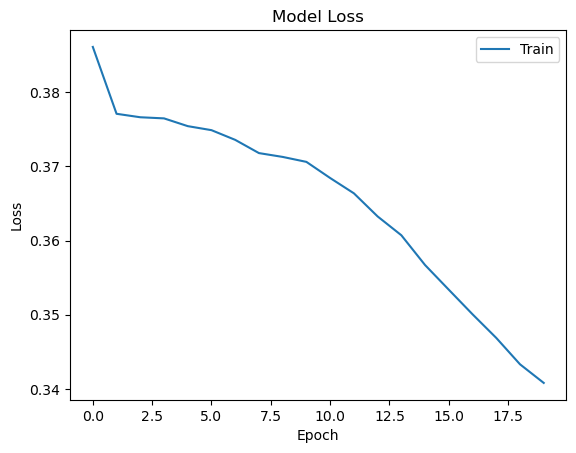

In [18]:
plot_loss(history)

### Paso 5.

In [19]:
new_data = np.reshape(np.array(df_test.temperatura),(df_test.shape[0], 1, 1))

In [20]:
# Get the predicted probabilities
predictions = time_series.predictions(new_data)

In [21]:
threshold =0.500
pred = (predictions > threshold).astype(int)
data_validation = df_test.fallo
# Compute F1 score
f1 = f1_score(data_validation, pred, average='macro')
print(f'F1 score: {f1}')

F1 score: 0.3198247535596933


###  Conclusiones y proximos pasos:
#### a) Mejorar el preprocesamiento de datos: Revisar y mejorar el proceso de limpieza y preprocesamiento de datos. Asegurarse de que no haya errores y de que se hayan abordado adecuadamente los valores faltantes y los outliers.
#### b) Ingeniería de características: Crear características adicionales que puedan ser útiles para la predicción, como variables derivadas de las series temporales, estadísticas resumidas y otras características relevantes para el contexto del problema.
#### c) Revisar el algoritmo seleccionado: Puede ser útil probar otros algoritmos de aprendizaje supervisado. Además, explorar técnicas de ensembling, como la combinación de múltiples modelos, para mejorar el rendimiento.
#### d) Optimización de hiperparámetros: Realizar una búsqueda más exhaustiva de los hiperparámetros del modelo para mejorar su rendimiento. Se pueden utilizar técnicas como la búsqueda en cuadrícula (Grid Search) o la optimización bayesiana para encontrar los hiperparámetros óptimos.
#### e) Aumentar el tamaño del conjunto de datos: Si es posible, obtener más datos para aumentar el tamaño del conjunto de entrenamiento, validación y prueba. Más datos pueden mejorar el rendimiento del modelo y proporcionar una evaluación más sólida.
#### f) Reevaluar el rendimiento: Después de realizar las mejoras, volver a evaluar el rendimiento del modelo utilizando las métricas apropiadas, como el F1_score y la curva ROC-AUC. Si el rendimiento ha mejorado significativamente, considerar la implementación del sistema de alerta temprana.